In [2]:
import numpy as np
import pandas as pd
import psycopg2

In [3]:
import pandas as pd
import psycopg2

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

In [8]:
# General Overview
print(mydata.shape)

(150001, 55)


In [9]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [10]:
print(mydata.describe())

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

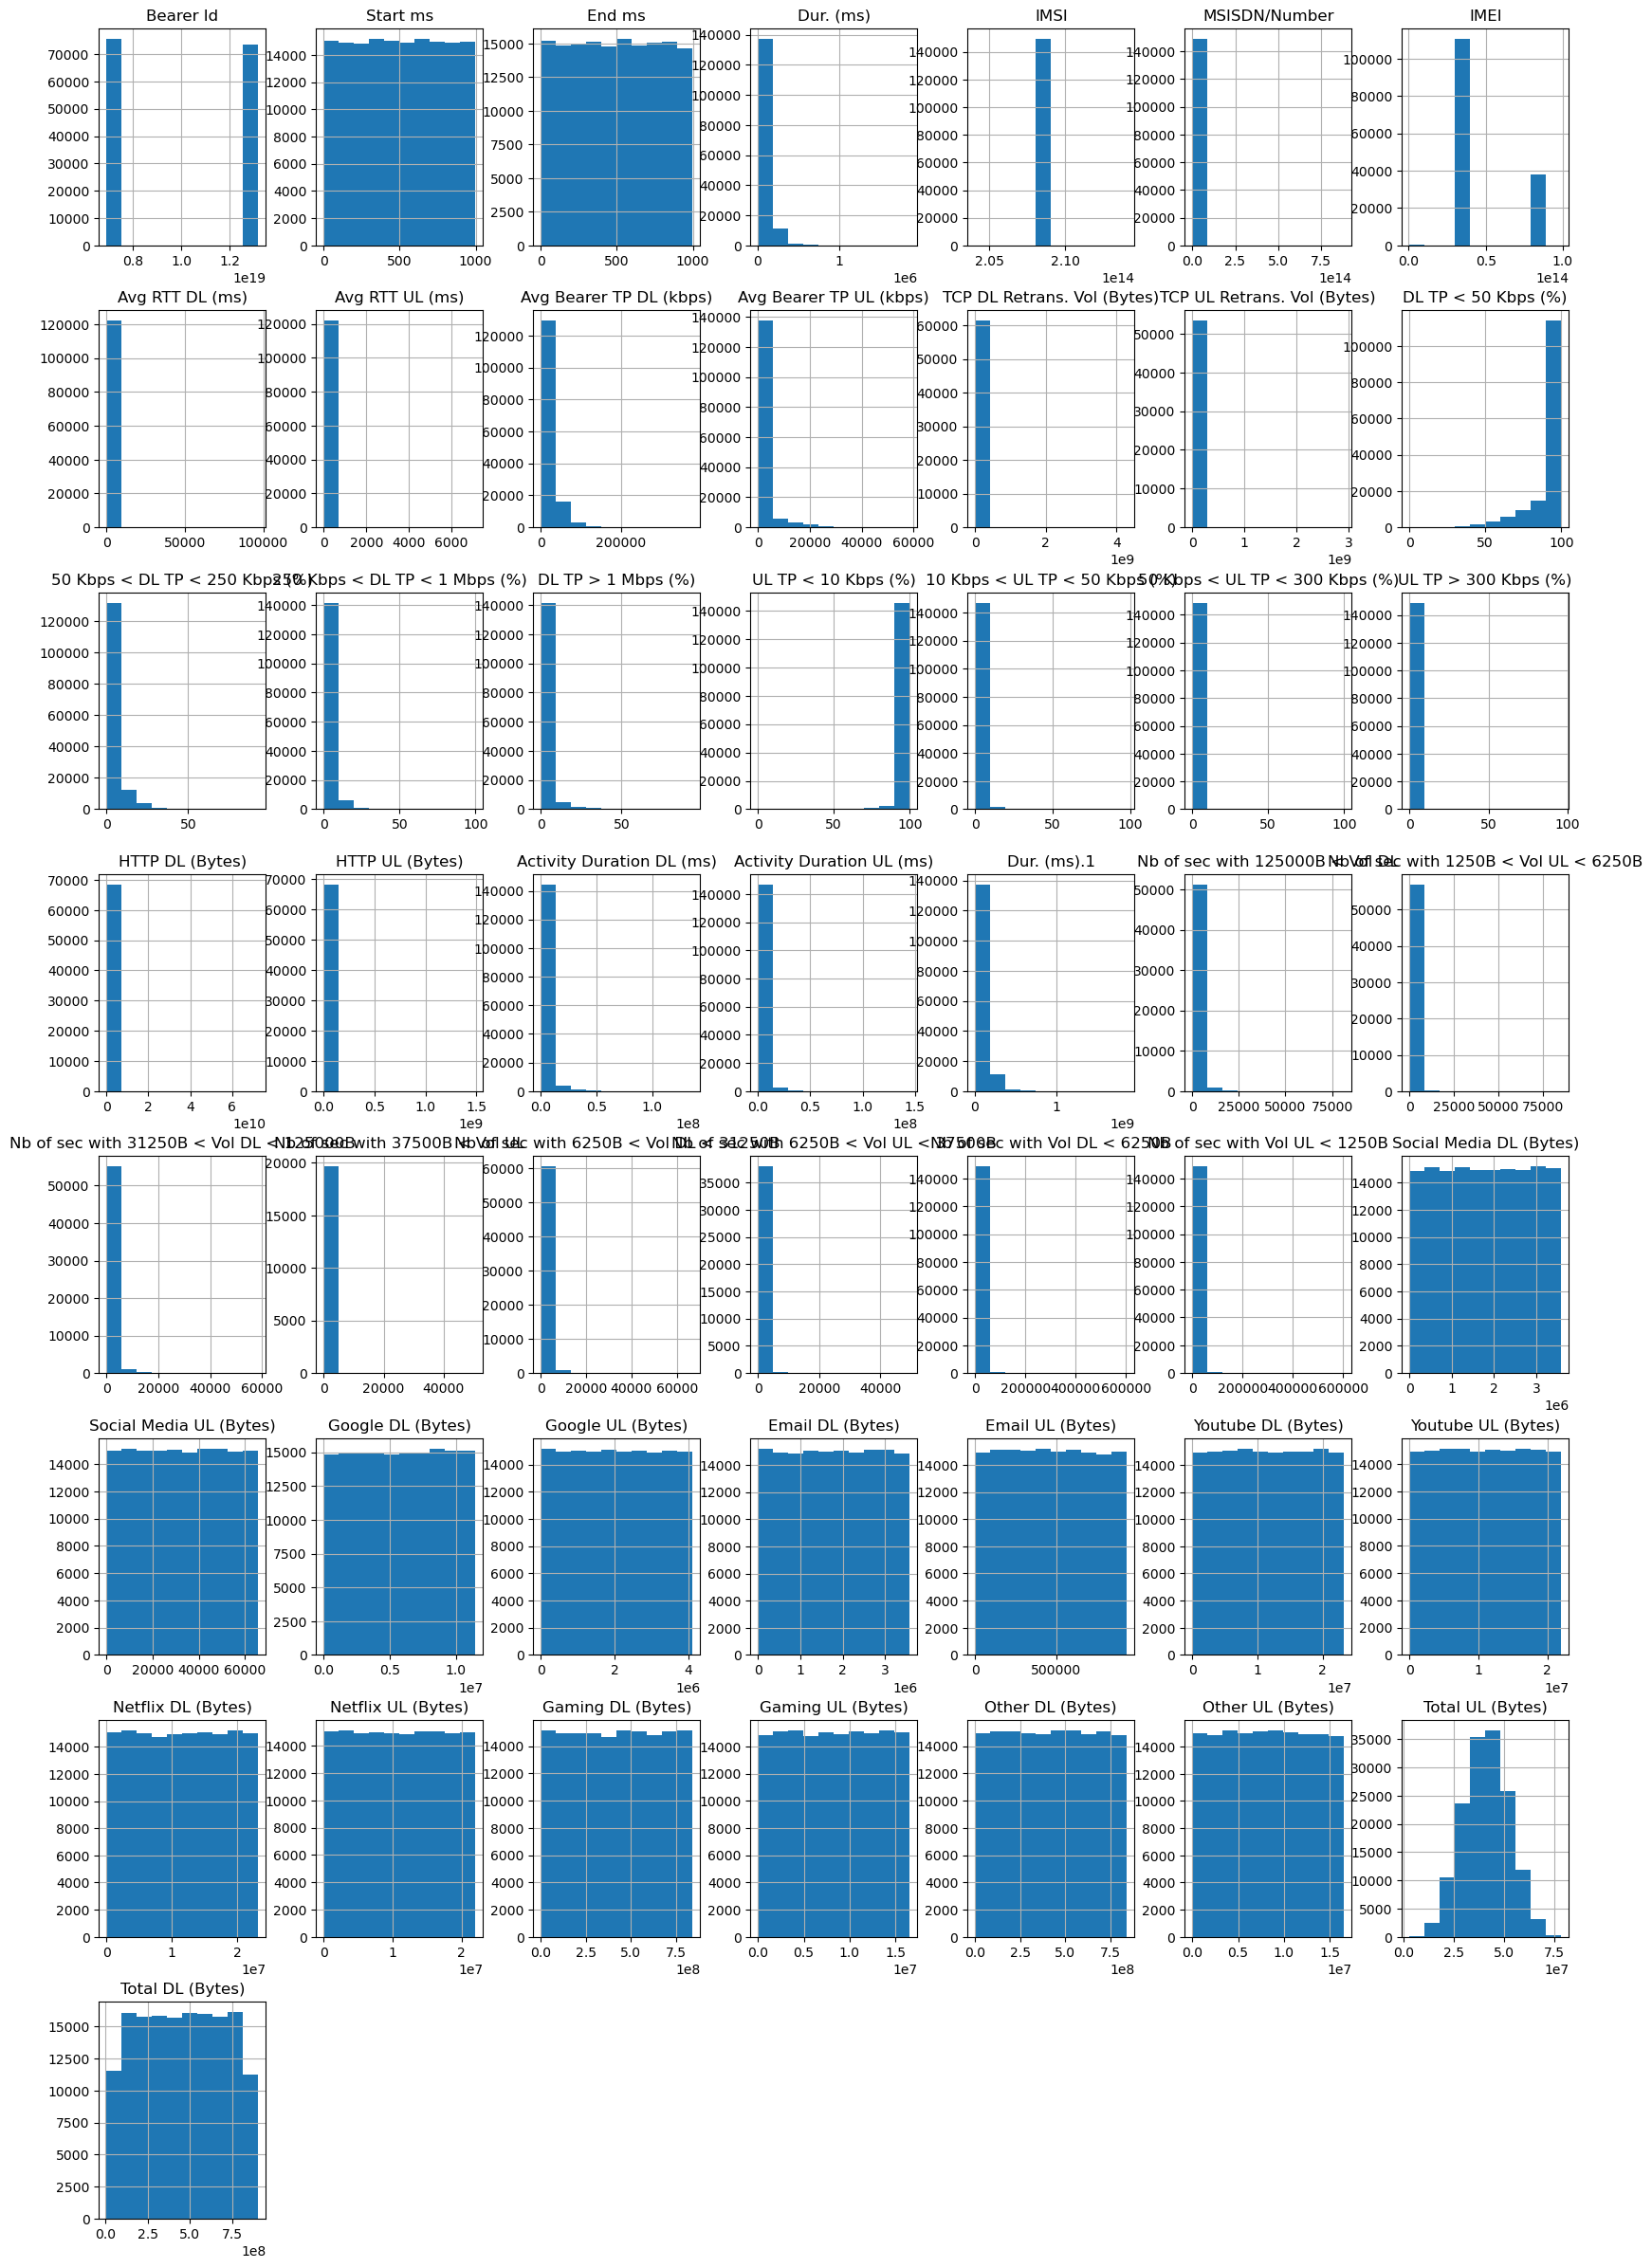

In [12]:
#Visualizing Data Distribution
mydata.hist(figsize=(20, 30))
plt.show()

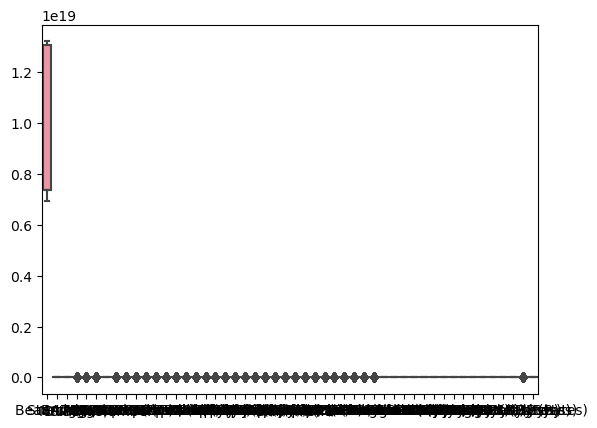

In [13]:
#Identify Outliers
sns.boxplot(data=mydata)
plt.show()

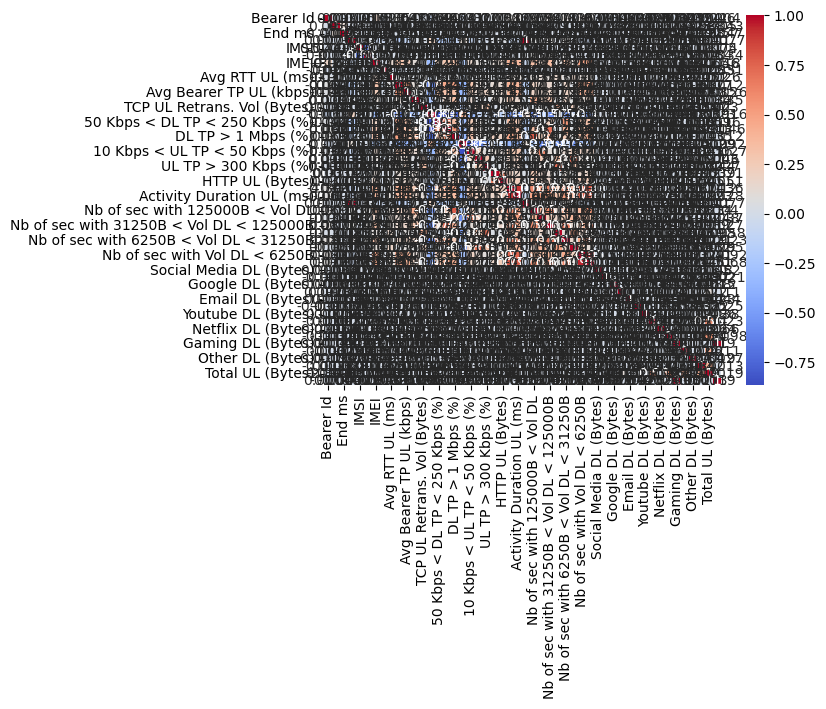

In [16]:
#Correlation Matrix
numeric_columns = mydata.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(mydata[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()